In [75]:
import pandas as pd

file_path = '/Users/maryan/Downloads/Tourism Project/kenya_tourism_data.xlsx'

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Print the names of all sheets in the Excel file
print(xls.sheet_names)

['Point_of_Entry', 'Top_Source_Market', 'Market Region', 'Purpose_of_Visit', 'Flight_Landings', 'Bed_Occupancy', 'Inbound_Earnings']


## TREND ANALYSIS
# Number of Tourist Arrivals

In [76]:
# Total Number of Arrivals Each Year
point_of_entry_data = pd.read_excel(file_path, sheet_name='Point_of_Entry')

# Group by 'YEAR' and sum up 'ARRIVALS'
total_arrivals_by_year = point_of_entry_data.groupby('YEAR')['ARRIVALS'].sum()

# Display the total arrivals for each year
print(total_arrivals_by_year)

YEAR
2018    2025204
2019    2048814
2020     567804
2021     870455
2022    1483752
Name: ARRIVALS, dtype: int64


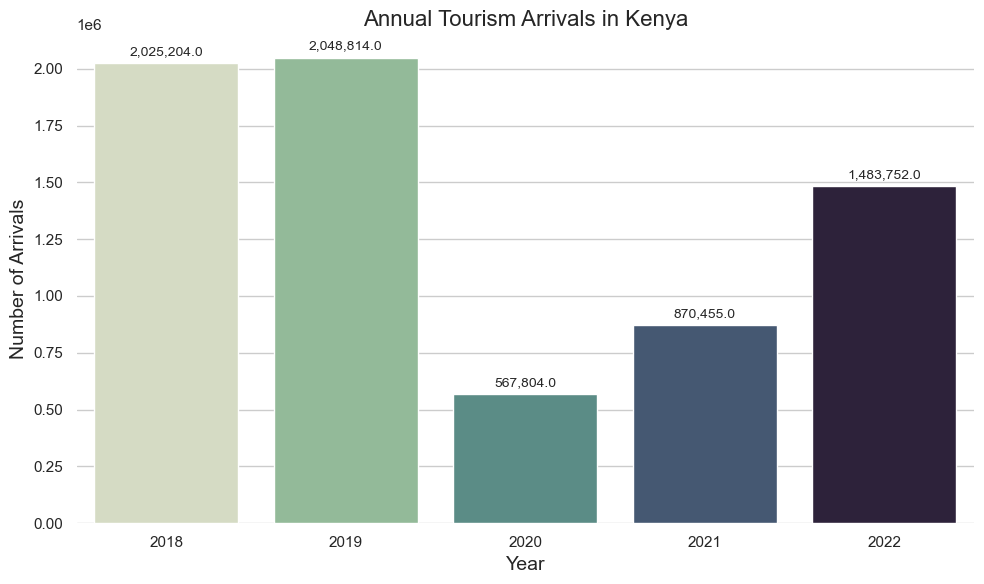

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Provided data as a dictionary
year_arrivals_dict = {
    'YEAR': [2018, 2019, 2020, 2021, 2022],
    'ARRIVALS': [2025204, 2048814, 567804, 870455, 1483752]
}

# Convert dictionary to DataFrame
year_arrivals_df = pd.DataFrame(year_arrivals_dict)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = sns.barplot(x='YEAR', y='ARRIVALS', data=year_arrivals_df, palette=sns.cubehelix_palette(5, start=.5, rot=-.75))

# Adding the text on top of each bar
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), ','),
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='center',
                  size=10, xytext=(0, 8),
                  textcoords='offset points')

# Enhancing the plot
plt.title('Annual Tourism Arrivals in Kenya', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Arrivals', fontsize=14)
sns.despine(left=True, bottom=True)  # Remove the left and bottom spines
plt.tight_layout()

# Show the plot
plt.show()

In [78]:
# Total Number of Arrivals each year grouped by Point of Entry 
point_of_entry_data = pd.read_excel(file_path, sheet_name='Point_of_Entry')
total_arrivals_by_year_and_entry = point_of_entry_data.groupby(['YEAR', 'POINT_OF_ENTRY'])['ARRIVALS'].sum()
print(total_arrivals_by_year_and_entry)

YEAR  POINT_OF_ENTRY
2018  JKIA              1342513
      MIA                118113
      Other              564578
2019  JKIA              1423971
      MIA                128222
      Other              496621
2020  JKIA               392318
      MIA                 33786
      Other              141700
2021  JKIA               644194
      MIA                 48749
      Other              177512
2022  JKIA              1062762
      MIA                 84860
      Other              336130
Name: ARRIVALS, dtype: int64


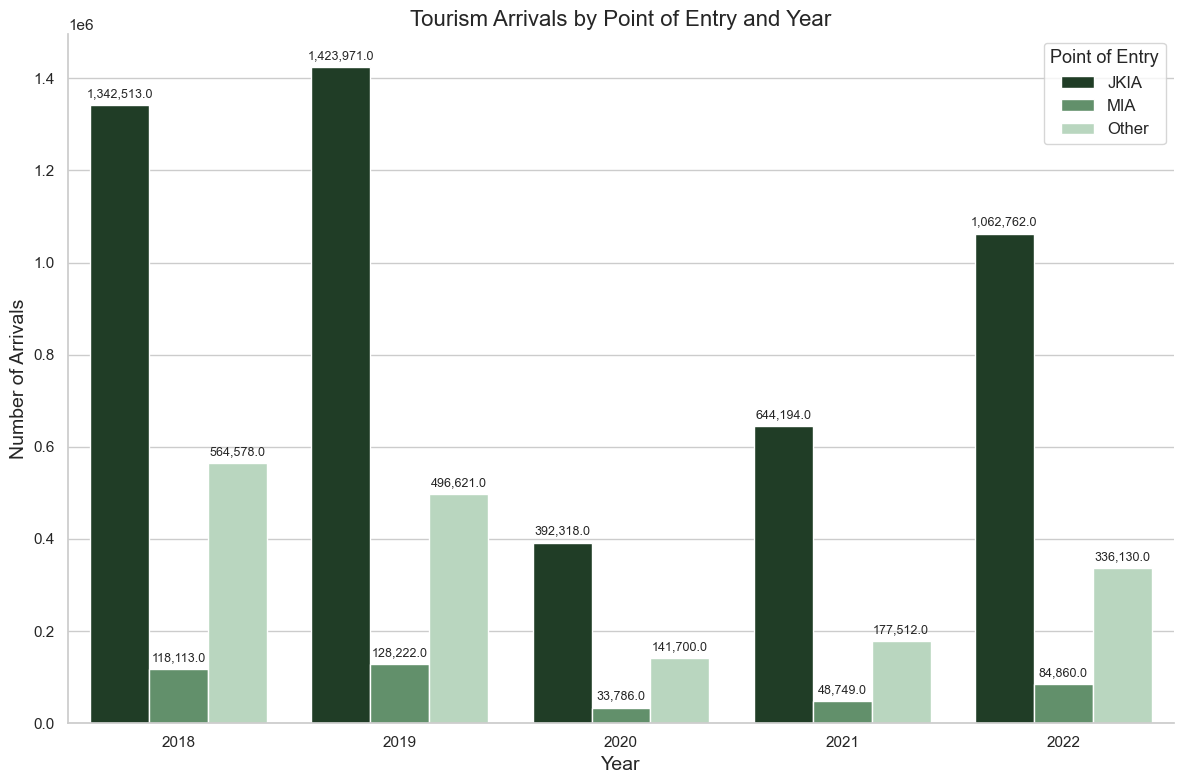

In [79]:
# Provided data as a dictionary
data_dict = {
    'YEAR': [2018, 2018, 2018, 2019, 2019, 2019, 2020, 2020, 2020, 2021, 2021, 2021, 2022, 2022, 2022],
    'POINT_OF_ENTRY': ['JKIA', 'MIA', 'Other', 'JKIA', 'MIA', 'Other', 'JKIA', 'MIA', 'Other', 'JKIA', 'MIA', 'Other', 'JKIA', 'MIA', 'Other'],
    'ARRIVALS': [1342513, 118113, 564578, 1423971, 128222, 496621, 392318, 33786, 141700, 644194, 48749, 177512, 1062762, 84860, 336130]
}

# Convert dictionary to DataFrame
data_df = pd.DataFrame(data_dict)

# Plotting
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='YEAR', y='ARRIVALS', hue='POINT_OF_ENTRY', data=data_df,
                      palette=sns.cubehelix_palette(3, start=2, rot=0, dark=0.2, light=0.8, reverse=True))



# Adding the text on top of each bar
for bar in barplot.patches:
    barplot.annotate(format(bar.get_height(), ','),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center',
                     size=9, xytext=(0, 8),
                     textcoords='offset points')

# Enhancing the plot
plt.title('Tourism Arrivals by Point of Entry and Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Arrivals', fontsize=14)
plt.legend(title='Point of Entry', title_fontsize='13', fontsize='12')
sns.despine()  # Remove the top and right spines
plt.tight_layout()

# Show the plot
plt.show()

In [80]:
# Number of arrivals for each month
import pandas as pd

# Assuming point_of_entry_data is already defined and loaded as shown previously

# Convert 'MONTH' to a datetime format to extract the month number for easier grouping
# Note: This step assumes the MONTH column contains full month names as strings
point_of_entry_data['MONTH_NUM'] = pd.to_datetime(point_of_entry_data['MONTH'], format='%B', errors='coerce').dt.month

# Group by 'YEAR' and 'MONTH_NUM', then sum 'ARRIVALS' for each group
total_arrivals_by_month_and_year = point_of_entry_data.groupby(['YEAR', 'MONTH_NUM'])['ARRIVALS'].sum().reset_index()

# Sort the results by 'YEAR' and 'MONTH_NUM' for easier readability
total_arrivals_sorted = total_arrivals_by_month_and_year.sort_values(by=['YEAR', 'MONTH_NUM'])

# Display the sorted total arrivals by month and year
print(total_arrivals_sorted)

    YEAR  MONTH_NUM  ARRIVALS
0   2018          1    170681
1   2018          2    151507
2   2018          3    155266
3   2018          4    143205
4   2018          5    142681
5   2018          6    164455
6   2018          7    204621
7   2018          8    210343
8   2018          9    172421
9   2018         10    170101
10  2018         11    154856
11  2018         12    185067
12  2019          1    173304
13  2019          2    152835
14  2019          3    147279
15  2019          4    146259
16  2019          5    139538
17  2019          6    166692
18  2019          7    206340
19  2019          8    213591
20  2019          9    169574
21  2019         10    203118
22  2019         11    154253
23  2019         12    176031
24  2020          1    170803
25  2020          2    150968
26  2020          3     67819
27  2020          4        27
28  2020          5       137
29  2020          6       581
30  2020          7       675
31  2020          8     14049
32  2020  

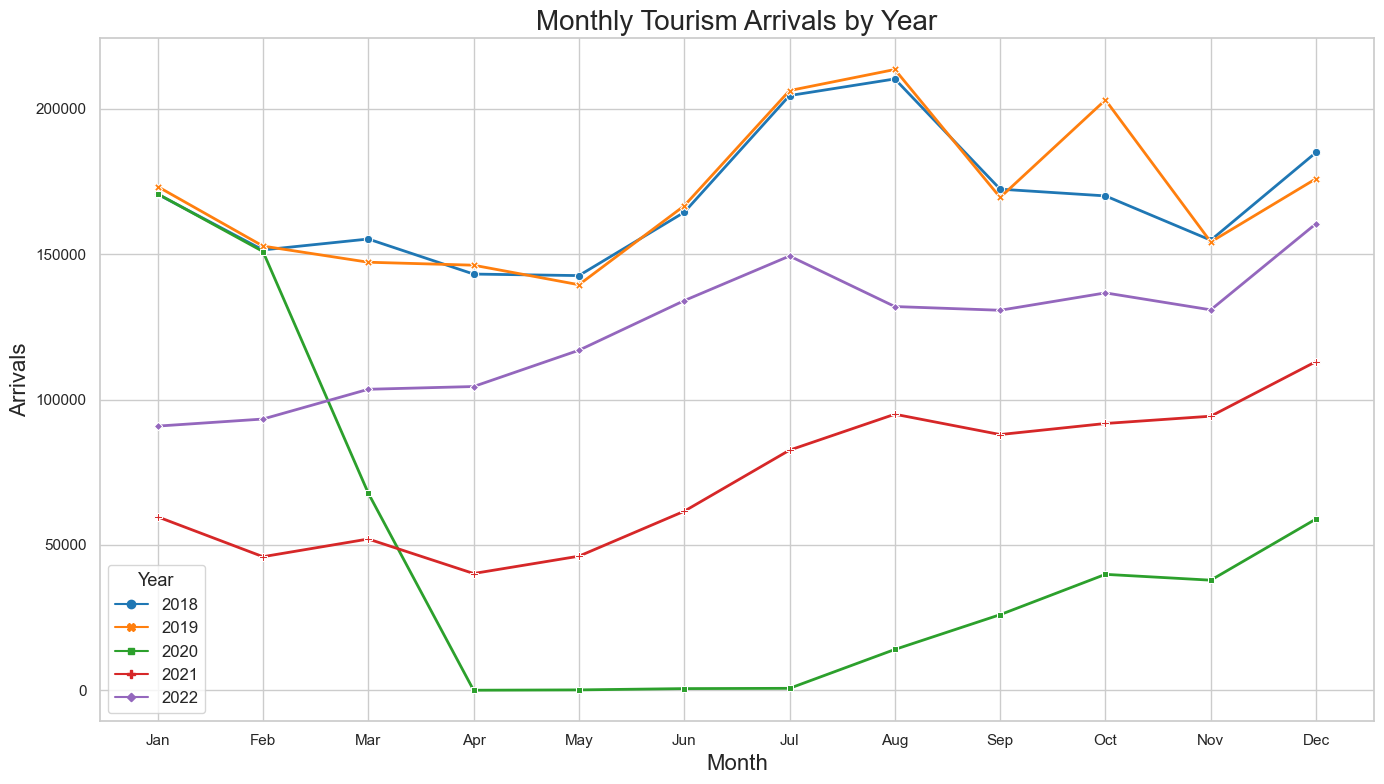

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Provided data as a dictionary
data_dict = {
    'YEAR': [
        2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
        2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
        2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
        2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021,
        2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022
    ],
    'MONTH_NUM': [
        1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
        1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
        1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
        1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
        1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12
    ],
    'ARRIVALS': [
        170681, 151507, 155266, 143205, 142681, 164455, 204621, 210343, 172421, 170101, 154856, 185067,
        173304, 152835, 147279, 146259, 139538, 166692, 206340, 213591, 169574, 203118, 154253, 176031,
        170803, 150968, 67819, 27, 137, 581, 675, 14049, 26019, 39893, 37885, 58948,
        59687, 45964, 52051, 40183, 46142, 61608, 82624, 94987, 87991, 91799, 94308, 113111,
        90898, 93330, 103568, 104512, 116993, 134069, 149411, 132031, 130753, 136733, 130898, 160556
    ]
}

# Convert dictionary to DataFrame
data_df = pd.DataFrame(data_dict)


# Correcting the pivot call with named arguments
pivot_df_corrected = data_df.pivot(index="MONTH_NUM", columns="YEAR", values="ARRIVALS")

# Plotting with the corrected DataFrame
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

# Using lineplot with markers for each data point, corrected DataFrame used
sns.lineplot(data=pivot_df_corrected, dashes=False, markers=True, linewidth=2, palette="tab10")

# Enhancing the plot
plt.title('Monthly Tourism Arrivals by Year', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Arrivals', fontsize=16)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', title_fontsize='13', fontsize='12')
plt.tight_layout()

# Show the plot
plt.show()

In [82]:
# Total arrivals per month across all entry points 

import pandas as pd

# Assuming point_of_entry_data is already defined and loaded as shown previously

# Convert 'MONTH' to a datetime format to facilitate chronological sorting
# This creates a temporary column 'MONTH_TEMP' for sorting purposes
point_of_entry_data['MONTH_TEMP'] = pd.to_datetime(point_of_entry_data['MONTH'], format='%B', errors='coerce')

# Group by the datetime-formatted 'MONTH_TEMP' column, then sum 'ARRIVALS' for each group
# Since 'MONTH_TEMP' includes year information, extract just the month part for grouping
total_arrivals_per_month = point_of_entry_data.groupby(point_of_entry_data['MONTH_TEMP'].dt.month)['ARRIVALS'].sum()

# Since grouping by month number loses the month names, map them back for readability
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
total_arrivals_per_month.index = total_arrivals_per_month.index.map(month_names)

# Display the total arrivals per month across all entry points
print(total_arrivals_per_month)

MONTH_TEMP
January      665373
February     594604
March        525983
April        434186
May          445491
June         527405
July         643671
August       665001
September    586758
October      641644
November     572200
December     693713
Name: ARRIVALS, dtype: int64


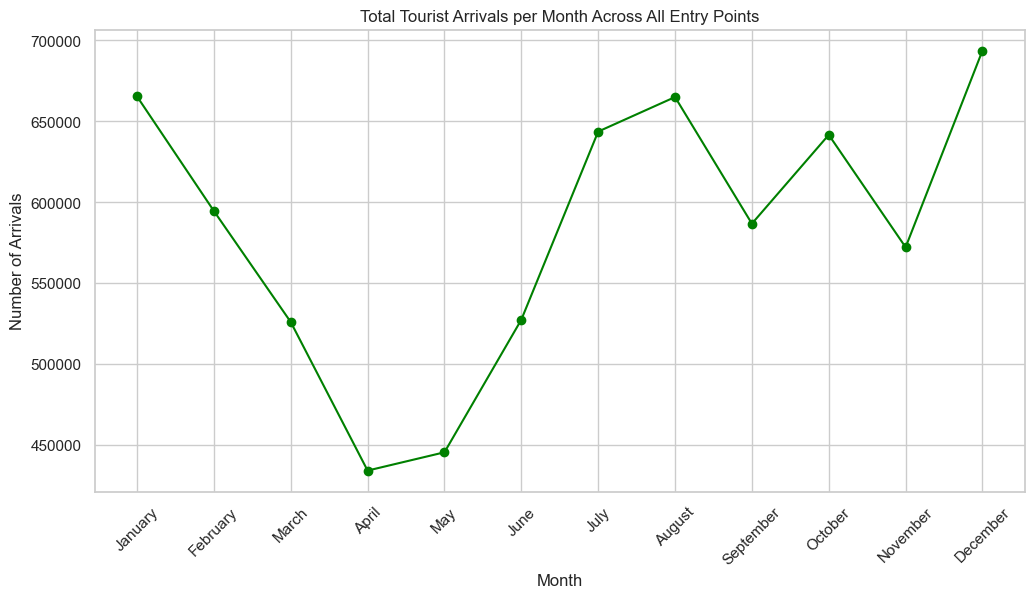

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Plotting the total arrivals per month across all entry points as a line graph
plt.figure(figsize=(12, 6))
plt.plot(total_arrivals_per_month.index, total_arrivals_per_month.values, marker='o', linestyle='-', color='green')
plt.title('Total Tourist Arrivals per Month Across All Entry Points')
plt.xlabel('Month')
plt.ylabel('Number of Arrivals')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

# Source Markets (Countries)

In [84]:

sheet_name = 'Top_Source_Market'

# Reading the Excel file
top_source_market_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the dataframe to understand its structure
top_source_market_data.head()

,YEAR,TOP SOURCE_MARKETS,ARRIVALS
0,2018,USA,225157
1,2018,Tanzania,212216
2,2018,Uganda,204082
3,2018,UK,184002
4,2018,India,125032


### Market Share Analysis

In [85]:
# To perform the market share analysis on the updated data, we need to calculate the total arrivals per year again
updated_total_arrivals_per_year = updated_top_source_market_data.groupby('YEAR')['ARRIVALS'].sum()

# Merge the updated total arrivals with the original dataframe to calculate the market share for each source market per year
updated_top_source_market_data_merged = updated_top_source_market_data.merge(updated_total_arrivals_per_year, on='YEAR', suffixes=('', '_TOTAL'))

# Calculate market share for each source market per year
updated_top_source_market_data_merged['MARKET_SHARE'] = (updated_top_source_market_data_merged['ARRIVALS'] / updated_top_source_market_data_merged['ARRIVALS_TOTAL']) * 100

# Pivot table for better visualization of market share per year for each source market
updated_market_share_pivot = updated_top_source_market_data_merged.pivot_table(index='TOP SOURCE_MARKETS', columns='YEAR', values='MARKET_SHARE')

updated_market_share_pivot.reset_index()  # Reset the index to include 'TOP SOURCE_MARKETS' as a column in the table

YEAR,TOP SOURCE_MARKETS,2018,2019,2020,2021,2022
0,Agency of UN,NaN,0.693102,1.731776,NaN,1.153711
1,Australia,1.575394,1.570553,NaN,0.445650,0.924317
2,Belgium,0.767931,0.776569,0.797422,0.752034,0.731025
3,Burundi,1.576761,1.759412,NaN,1.820616,1.726926
4,Canada,2.384453,2.312912,3.689086,1.765305,2.141245
5,China,4.654465,4.745869,3.777688,4.172684,1.569580
6,DRC,1.126746,1.249702,0.918244,2.076574,1.660067
7,Denmark,0.847338,0.815851,1.175997,0.607356,0.816476
8,Djibouti,NaN,NaN,0.837696,NaN,NaN
9,Egypt,NaN,NaN,1.385421,NaN,NaN


### Percentage growth or decline for source markets over the years

In [86]:
# Load the updated 'Top_Source_Market' sheet from the new Excel file
updated_file_path = '/Users/maryan/Downloads/Tourism Project/kenya_tourism_data.xlsx'
updated_sheet_name = 'Top_Source_Market'

# Reading the updated Excel file
updated_top_source_market_data = pd.read_excel(updated_file_path, sheet_name=updated_sheet_name)

# Sort the updated data by 'TOP SOURCE_MARKETS' and then by 'YEAR' to ensure the correct calculation of percentage change
updated_top_source_market_data_sorted = updated_top_source_market_data.sort_values(by=['TOP SOURCE_MARKETS', 'YEAR'])

# Calculate the percentage change within each group of 'TOP SOURCE_MARKETS'
updated_top_source_market_data_sorted['PERCENT_CHANGE'] = updated_top_source_market_data_sorted.groupby('TOP SOURCE_MARKETS')['ARRIVALS'].pct_change() * 100

# Pivot this data to have years as columns for each source market's percentage change
updated_percentage_change_pivot = updated_top_source_market_data_sorted.pivot(index='TOP SOURCE_MARKETS', columns='YEAR', values='PERCENT_CHANGE')

# Return the table with all values
updated_percentage_change_pivot.reset_index()  # Reset the index to include 'TOP SOURCE_MARKETS' as a column in the table

YEAR,TOP SOURCE_MARKETS,2018,2019,2020,2021,2022
0,Agency of UN,NaN,NaN,-98.251748,NaN,6826.511628
1,Australia,NaN,0.762945,NaN,-87.885312,253.406398
2,Belgium,NaN,2.210519,-99.281515,5654.545455,65.631034
3,Burundi,NaN,12.781792,NaN,-55.820360,61.622680
4,Canada,NaN,-1.958957,-98.883988,2819.868996,106.677634
5,China,NaN,3.058415,-99.443046,6639.872068,-35.906359
6,DRC,NaN,12.103134,-99.485884,13699.122807,36.215117
7,Denmark,NaN,-2.682353,-98.991434,3051.369863,129.058900
8,Djibouti,NaN,NaN,NaN,NaN,NaN
9,Egypt,NaN,NaN,NaN,NaN,NaN


# Purpose of Visit 

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
purpose_of_visit_data = pd.read_excel(file_path, sheet_name='Purpose_of_Visit')

# Calculate the distribution of purposes for the most recent year
most_recent_year = purpose_of_visit_data['YEAR'].max()
distribution_recent_year = purpose_of_visit_data[purpose_of_visit_data['YEAR'] == most_recent_year].copy()
distribution_recent_year['PERCENTAGE'] = (distribution_recent_year['ARRIVALS'] / distribution_recent_year['ARRIVALS'].sum()) * 100

# Calculate the overall distribution across all years
overall_distribution = purpose_of_visit_data.groupby('PURPOSE_OF_VISIT')['ARRIVALS'].sum().reset_index()
overall_distribution['PERCENTAGE'] = (overall_distribution['ARRIVALS'] / overall_distribution['ARRIVALS'].sum()) * 100

distribution_recent_year, overall_distribution



(    YEAR         PURPOSE_OF_VISIT  ARRIVALS  PERCENTAGE
 20  2022                  Holiday    543485   36.628409
 21  2022  Visiting Family/Friends    413180   27.846446
 22  2022            Business&MICE    404183   27.240090
 23  2022                  Transit     74355    5.011188
 24  2022                Education     21354    1.439162
 25  2022                 Religion     12677    0.854372
 26  2022                  Medical     11354    0.765208
 27  2022                   Sports      3192    0.215126,
           PURPOSE_OF_VISIT  ARRIVALS  PERCENTAGE
 0            Business&MICE    912951   21.225860
 1                Education     40628    0.944590
 2                  Holiday   2130810   49.540748
 3               In Transit      1129    0.026249
 4                  Medical     20285    0.471621
 5                   Others    261226    6.073433
 6                 Religion     19759    0.459391
 7                   Sports      5248    0.122015
 8                  Transit    12100

### Share of each purpose

<Figure size 1400x800 with 0 Axes>

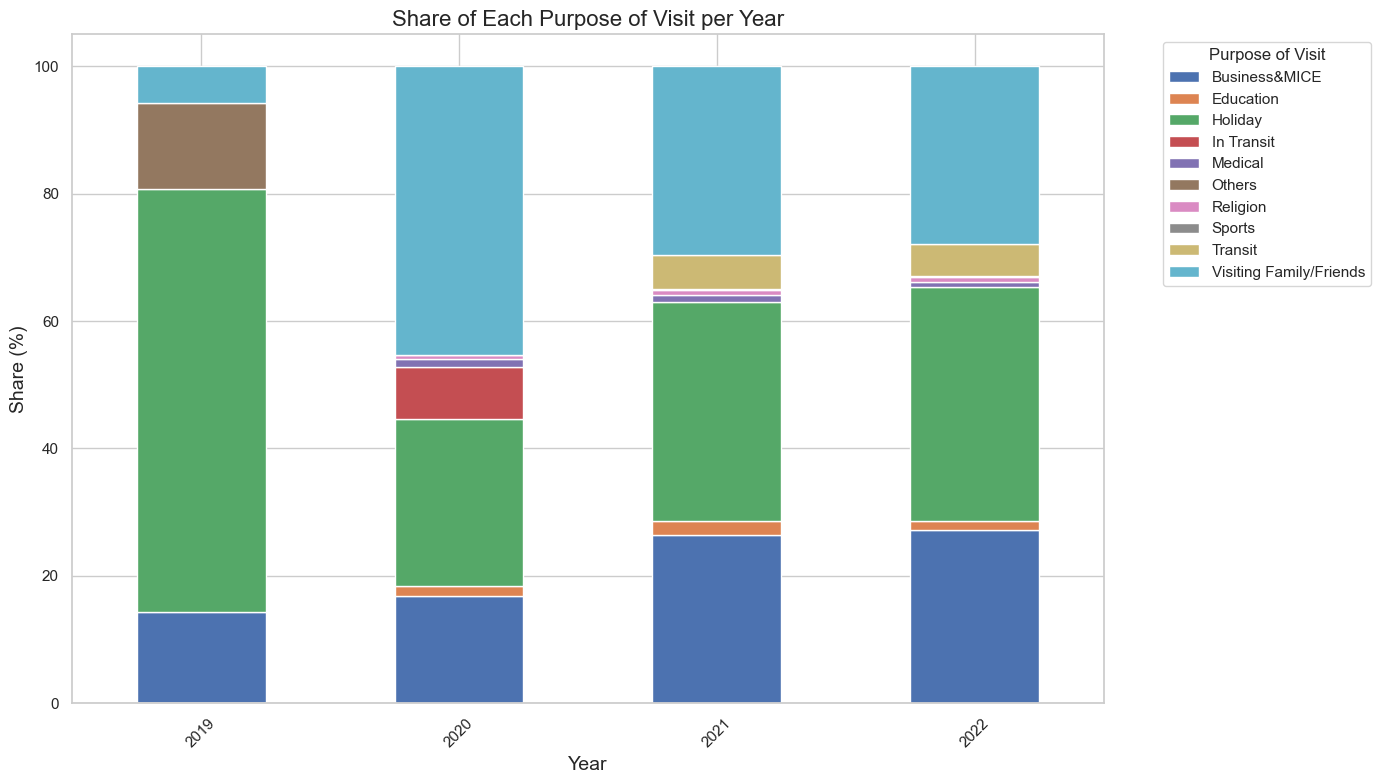

In [88]:
# Calculate the total arrivals per year
total_arrivals_per_year = purpose_of_visit_data.groupby('YEAR')['ARRIVALS'].sum().reset_index()

# Merge to get the total arrivals in the main dataframe
purpose_of_visit_data_with_total = pd.merge(purpose_of_visit_data, total_arrivals_per_year, on='YEAR', suffixes=('', '_TOTAL'))

# Calculate the share of each purpose
purpose_of_visit_data_with_total['SHARE'] = (purpose_of_visit_data_with_total['ARRIVALS'] / purpose_of_visit_data_with_total['ARRIVALS_TOTAL']) * 100

# Pivot for visualization
share_of_each_purpose_pivot = purpose_of_visit_data_with_total.pivot_table(index='YEAR', columns='PURPOSE_OF_VISIT', values='SHARE')

# Plotting
plt.figure(figsize=(14, 8))
share_of_each_purpose_pivot.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title('Share of Each Purpose of Visit per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Share (%)', fontsize=14)
plt.legend(title='Purpose of Visit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Flight Landings 

## Percentage Growth in flight landings 

In [90]:
df_flight_landings = pd.read_excel(file_path, sheet_name='Flight_Landings')

# Since we need to calculate the growth rate for each category separately, let's create a function for that
def calculate_monthly_growth_rates(df, category):
    """
    Calculate the monthly growth rates for a given flight category (International, Domestic, Transit).
    """
    # Pivot to get total for each category by month and year
    category_totals = df.pivot_table(index='MONTH', columns='YEAR', values=category, aggfunc='sum')
    
    # Calculate percentage growth rate year over year for each month
    growth_rates_category = category_totals.pct_change(axis=1) * 100
    
    # Reset index to make MONTH a column
    growth_rates_category.reset_index(inplace=True)
    
    # Order the months properly
    months_order = ["January", "February", "March", "April", "May", "June",
                    "July", "August", "September", "October", "November", "December"]
    growth_rates_category['MONTH'] = pd.Categorical(growth_rates_category['MONTH'], categories=months_order, ordered=True)
    growth_rates_category.sort_values('MONTH', inplace=True)
    
    return growth_rates_category

# Correctly use df_flight_landings in function calls
international_growth = calculate_monthly_growth_rates(df_flight_landings, 'INTERNATIONAL')
domestic_growth = calculate_monthly_growth_rates(df_flight_landings, 'DOMESTIC')
transit_growth = calculate_monthly_growth_rates(df_flight_landings, 'TRANSIT')

# To display the results correctly
international_growth, domestic_growth, transit_growth

(YEAR      MONTH  2019       2020          2021        2022
 4       January   NaN   5.581517    -68.672668   42.357855
 3      February   NaN   5.674803    -72.558836   98.346870
 7         March   NaN -47.148117    -39.635093  102.310495
 0         April   NaN -99.961998  67928.865979  143.030551
 8           May   NaN -99.558816   6290.662932  157.404594
 6          June   NaN -99.287888   4551.237113  120.744952
 5          July   NaN -99.406721   6067.911255   99.996491
 1        August   NaN -90.028034    277.283982   80.762585
 11    September   NaN -87.615045    232.043239   84.682255
 10      October   NaN -78.230083    115.229518   76.507771
 9      November   NaN -74.392461    109.835147   41.447174
 2      December   NaN -68.556102     76.193828   49.390441,
 YEAR      MONTH  2019        2020          2021          2022
 4       January   NaN   17.958707 -2.447820e+01     28.504460
 3      February   NaN   12.299976 -2.863244e+01     31.313921
 7         March   NaN  -26.15

## Flight landings for every month

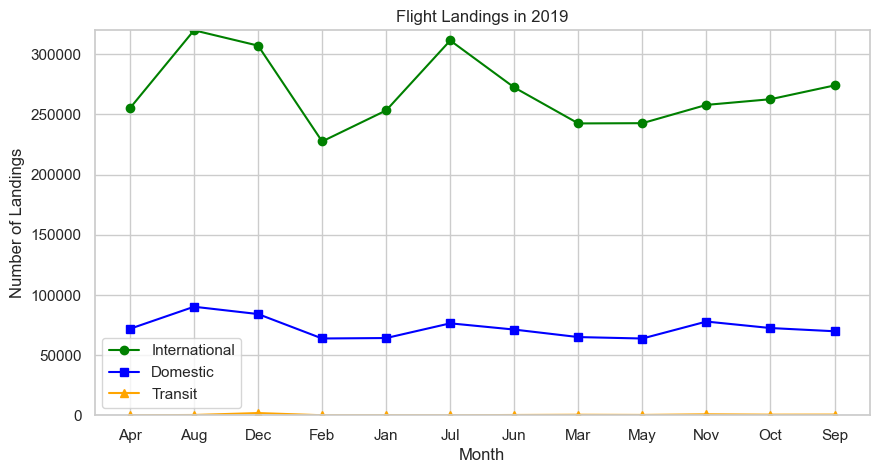

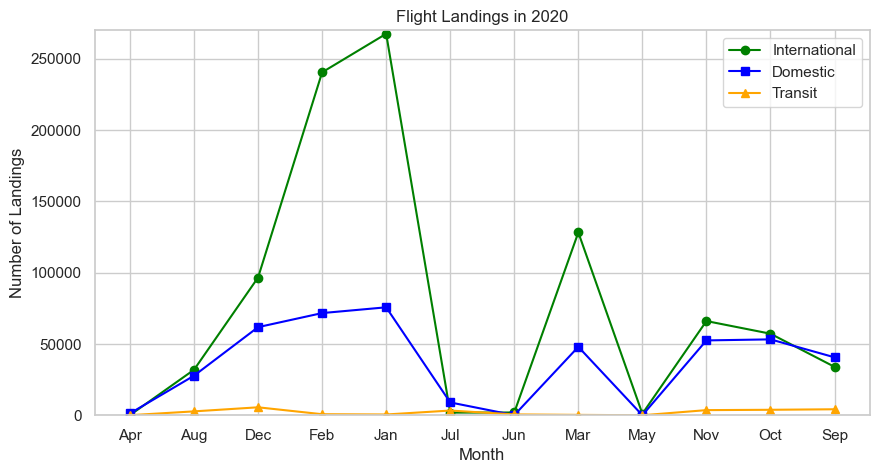

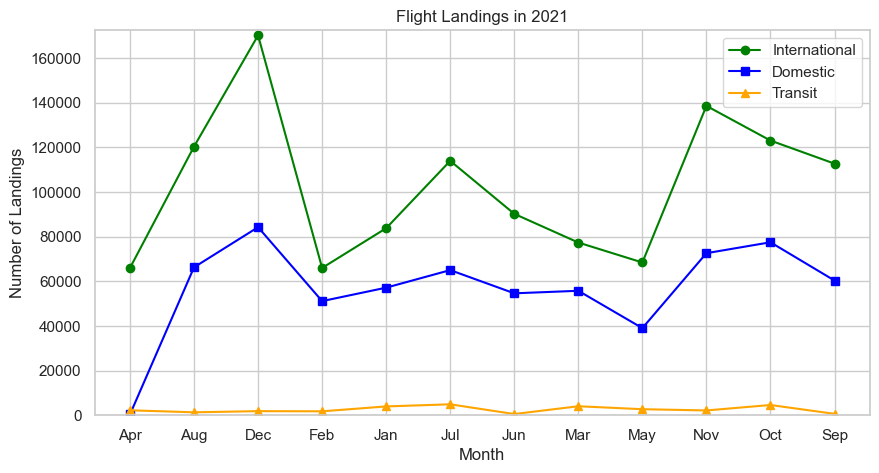

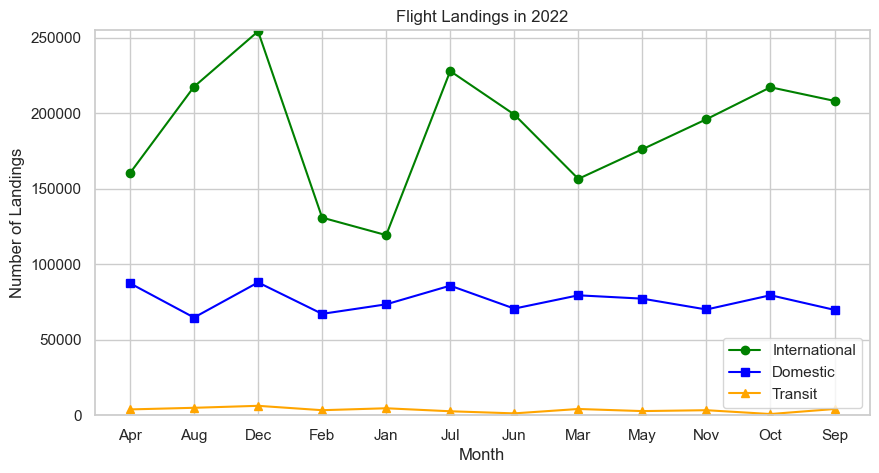

In [102]:
# Plotting each year separately with a scale difference of 2500 for better clarity

# Function to plot each year separately
def plot_flights_by_year(df, year):
    # Filter the data for the specified year
    df_year = df[df['YEAR'] == year]
    
    # Sort the DataFrame based on the month order
    df_year_sorted = df_year.sort_values('MONTH')
    
    # Create a plot
    plt.figure(figsize=(10, 5))
    
    # Plot each flight type with different colors and markers
    plt.plot(df_year_sorted['MONTH_ABBR'], df_year_sorted['INTERNATIONAL'], label='International', marker='o', color='green')
    plt.plot(df_year_sorted['MONTH_ABBR'], df_year_sorted['DOMESTIC'], label='Domestic', marker='s', color='blue')
    plt.plot(df_year_sorted['MONTH_ABBR'], df_year_sorted['TRANSIT'], label='Transit', marker='^', color='orange')
    
    # Set the title
    plt.title(f'Flight Landings in {year}')
    
    # Set the labels
    plt.xlabel('Month')
    plt.ylabel('Number of Landings')
    
    # Set y-axis with a fixed difference of 2500
    max_val = df_year_sorted[['INTERNATIONAL', 'DOMESTIC', 'TRANSIT']].max().max()
    ylim_upper = ((max_val // 2500) + 1) * 2500  # Calculate the upper limit so that the difference is 2500
    plt.ylim(0, ylim_upper)
    
    # Add legend
    plt.legend()
    
    # Show grid
    plt.grid(True)
    
    # Display the plot
    plt.show()

# Plotting for each year
for year in years:
    plot_flights_by_year(df_flight_landings, year)

# Bed Occupancy

## Trend Analysis

/var/folders/0q/j7vxjryx07d_c6s434mnp1m80000gn/T/ipykernel_68933/1897776961.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sheet_data['DATE'] = pd.to_datetime(sheet_data['YEAR'].astype(str) + ' ' + sheet_data['MONTH'])


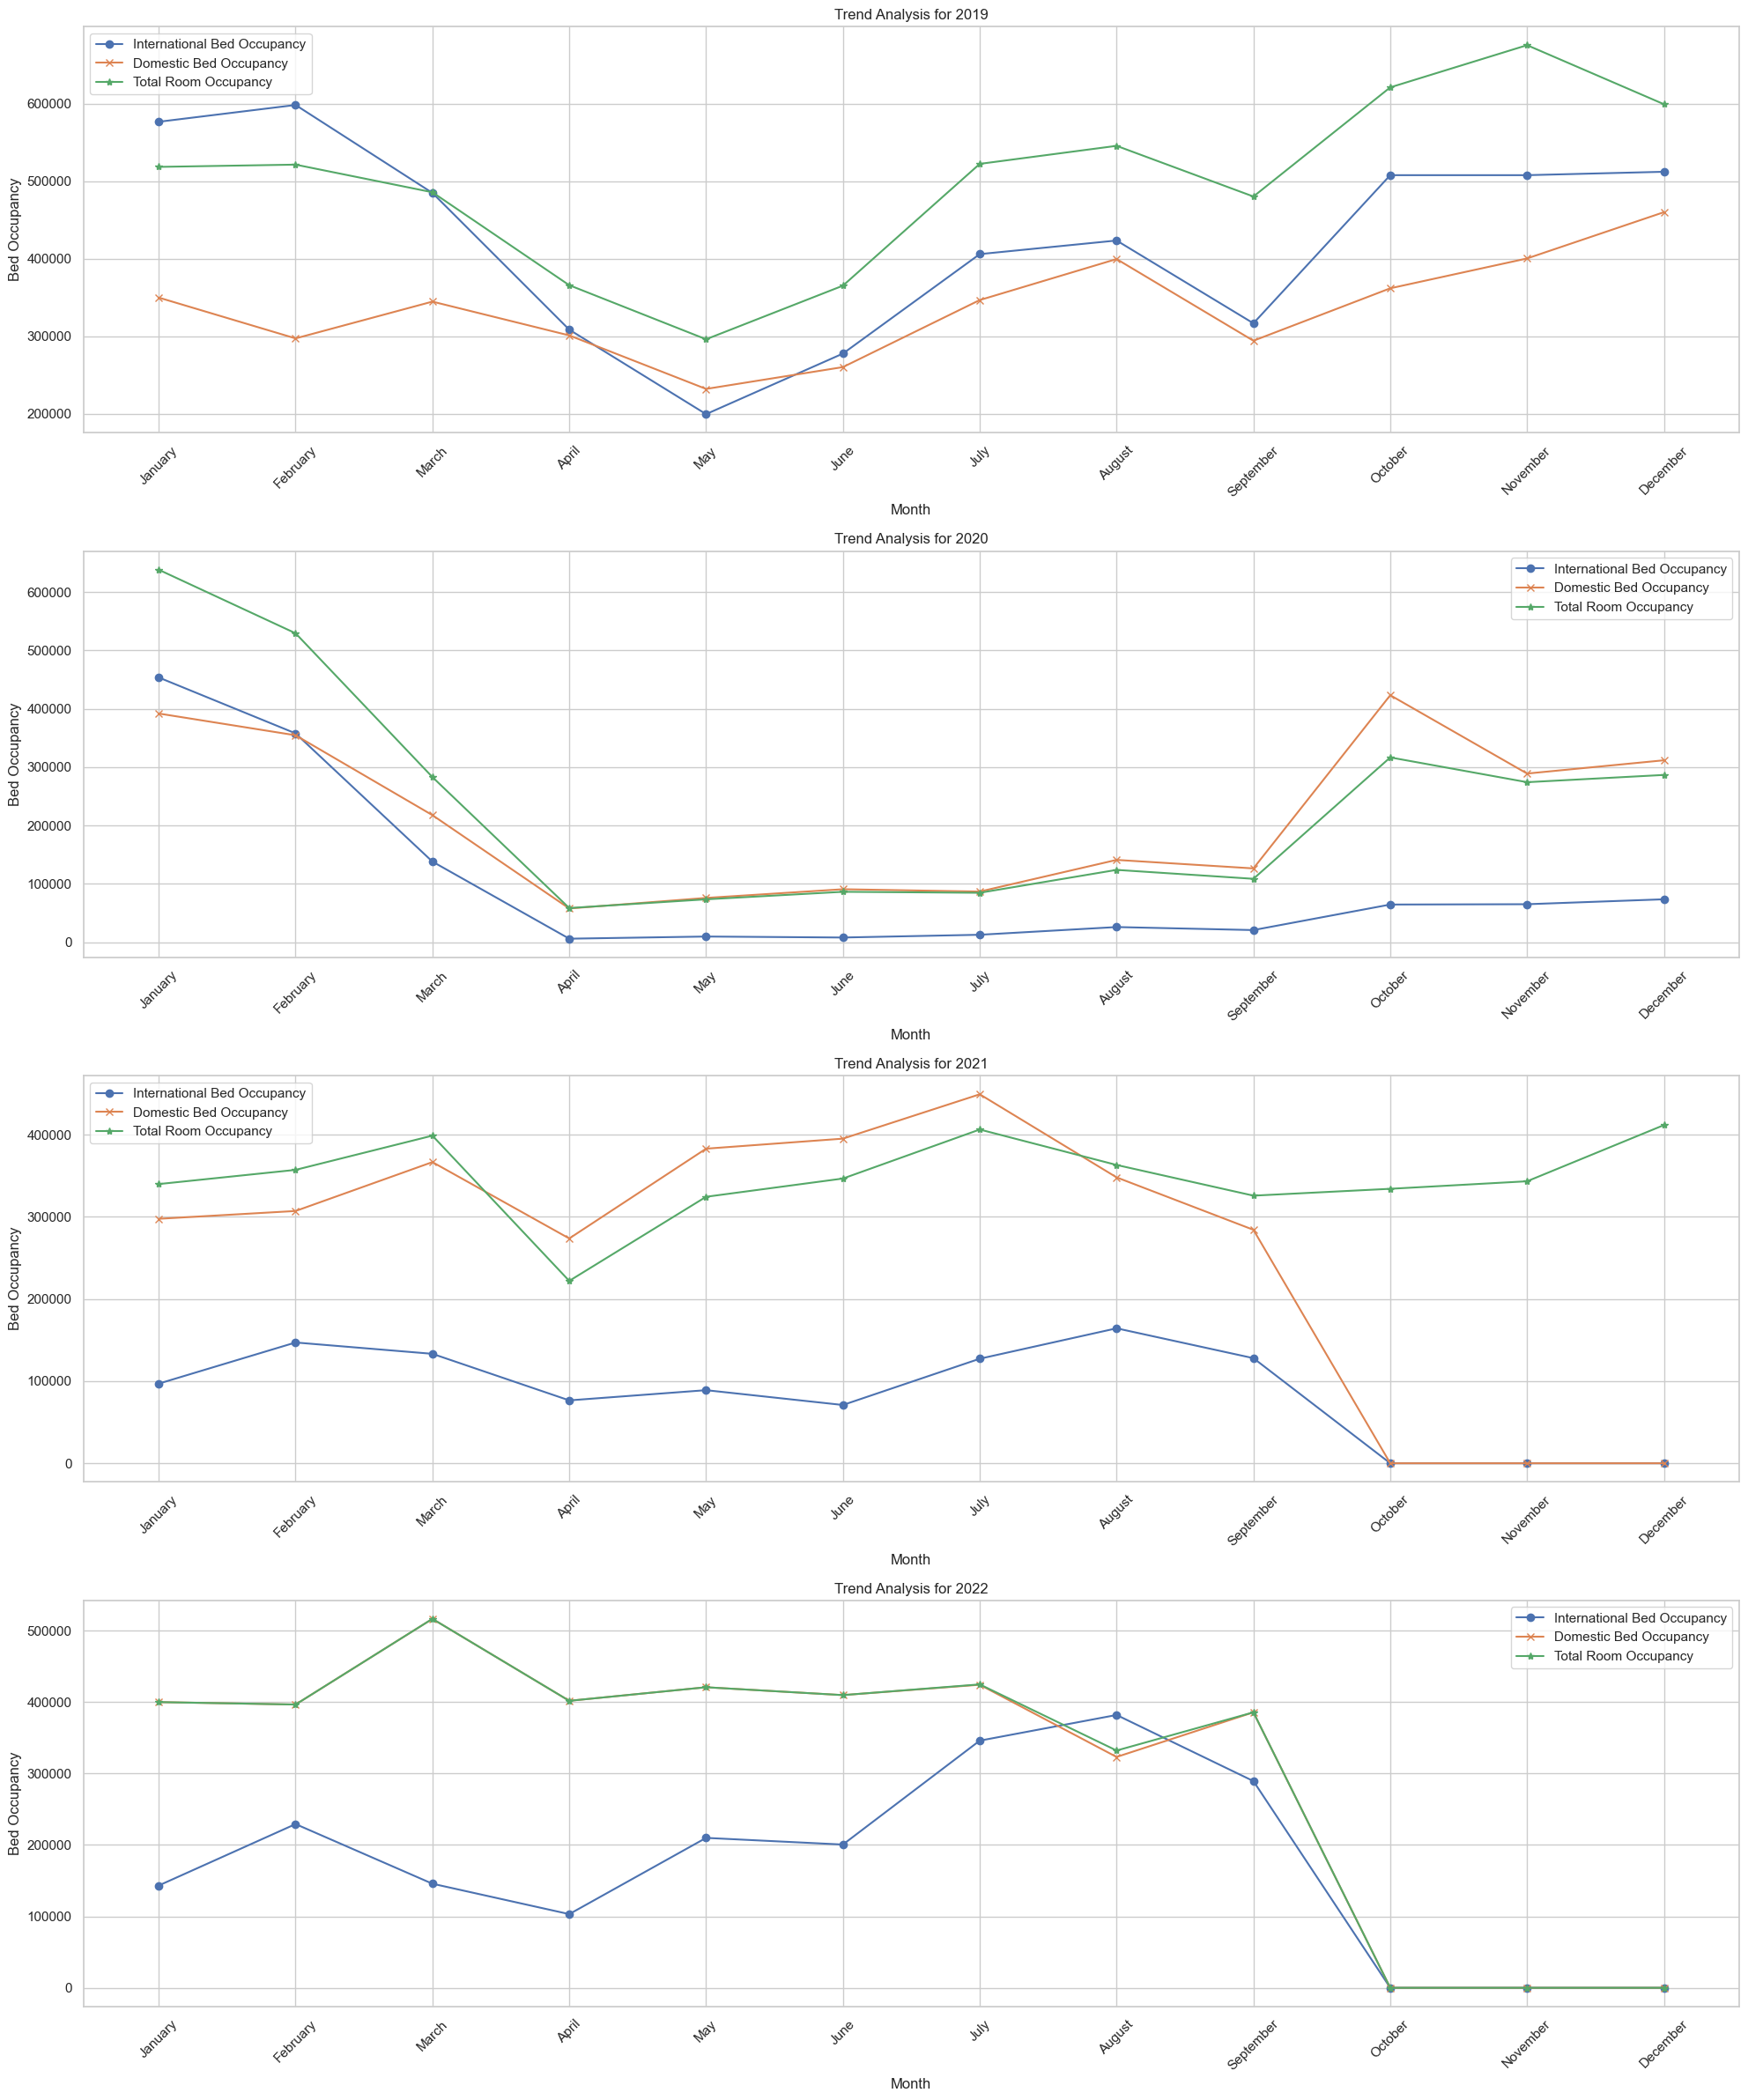

In [101]:

# Load the 6th sheet from the uploaded Excel file
sheet_name = 'Bed_Occupancy'

# Reading the 6th sheet
sheet_data = pd.read_excel(file_path, sheet_name=sheet_name)



# Convert 'YEAR' and 'MONTH' to a datetime to facilitate trend analysis
sheet_data['DATE'] = pd.to_datetime(sheet_data['YEAR'].astype(str) + ' ' + sheet_data['MONTH'])

# Sorting data by date to ensure correct plotting
sheet_data_sorted = sheet_data.sort_values('DATE')
# Creating separate plots for each year for trend analysis within each month
years = sheet_data_sorted['YEAR'].unique()
months = sheet_data_sorted['MONTH'].unique()

# Defining a DataFrame for each year's monthly data
yearly_dfs = {year: sheet_data_sorted[sheet_data_sorted['YEAR'] == year] for year in years}

plt.figure(figsize=(20, 6 * len(years)))  # Adjusting the scale for better visibility

for i, year in enumerate(years, start=1):
    plt.subplot(len(years), 1, i)
    plt.plot(yearly_dfs[year]['MONTH'], yearly_dfs[year]['INTERNATIONAL_BED OCCUPANCY'], label='International Bed Occupancy', marker='o')
    plt.plot(yearly_dfs[year]['MONTH'], yearly_dfs[year]['DOMESTIC_BED_OCCUPANCY'], label='Domestic Bed Occupancy', marker='x')
    plt.plot(yearly_dfs[year]['MONTH'], yearly_dfs[year]['ROOM_OCCUPANCY'], label='Total Room Occupancy', marker='*')
    
    plt.title(f'Trend Analysis for {year}')
    plt.xlabel('Month')
    plt.ylabel('Bed Occupancy')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

## Seasonal Analysis

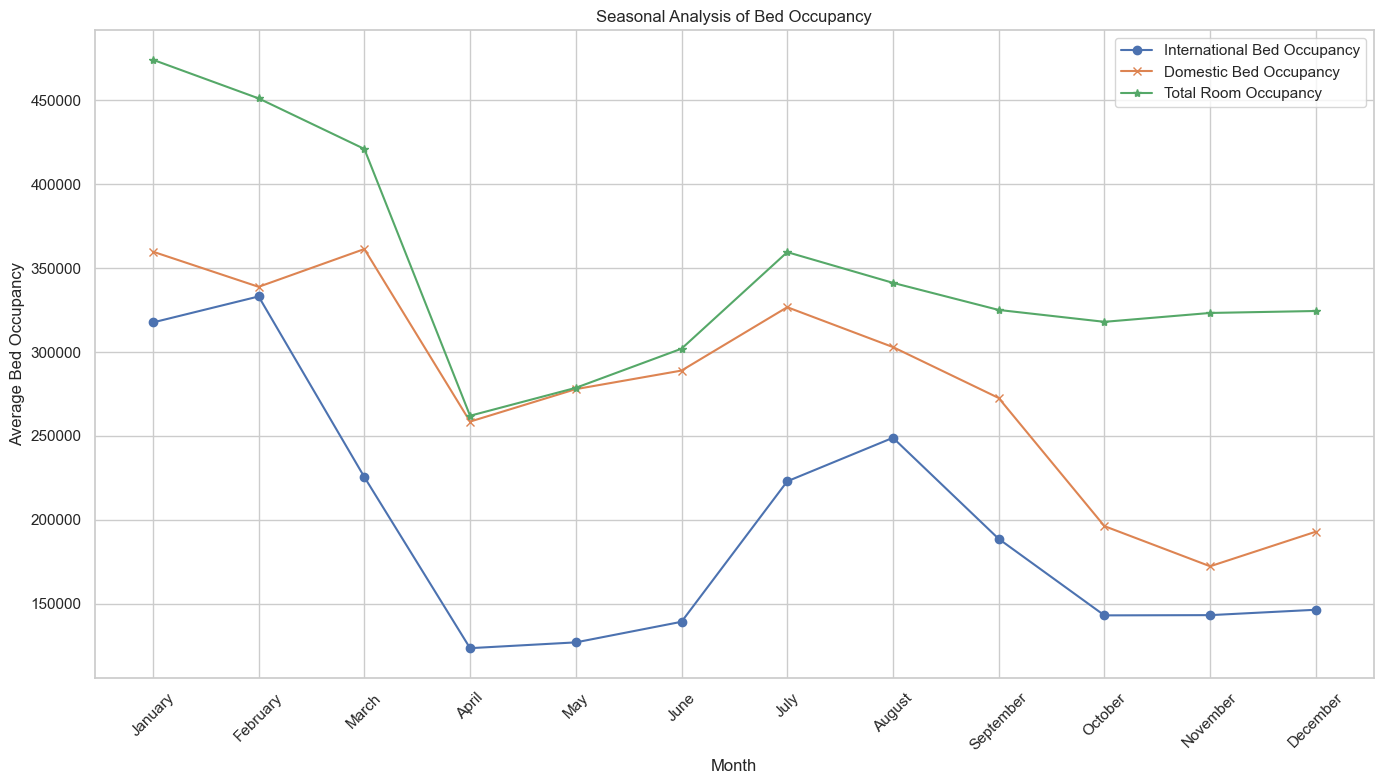

In [103]:
# Extract month and year from 'DATE' for seasonal analysis
sheet_data_sorted['MONTH'] = sheet_data_sorted['DATE'].dt.month_name()

# Grouping by month to calculate average occupancy
monthly_averages = sheet_data_sorted.groupby('MONTH').mean().reindex([
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
])

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(monthly_averages.index, monthly_averages['INTERNATIONAL_BED OCCUPANCY'], label='International Bed Occupancy', marker='o')
plt.plot(monthly_averages.index, monthly_averages['DOMESTIC_BED_OCCUPANCY'], label='Domestic Bed Occupancy', marker='x')
plt.plot(monthly_averages.index, monthly_averages['ROOM_OCCUPANCY'], label='Total Room Occupancy', marker='*')

plt.title('Seasonal Analysis of Bed Occupancy')
plt.xlabel('Month')
plt.ylabel('Average Bed Occupancy')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

## Monthly Averages for Bed_Occupancy

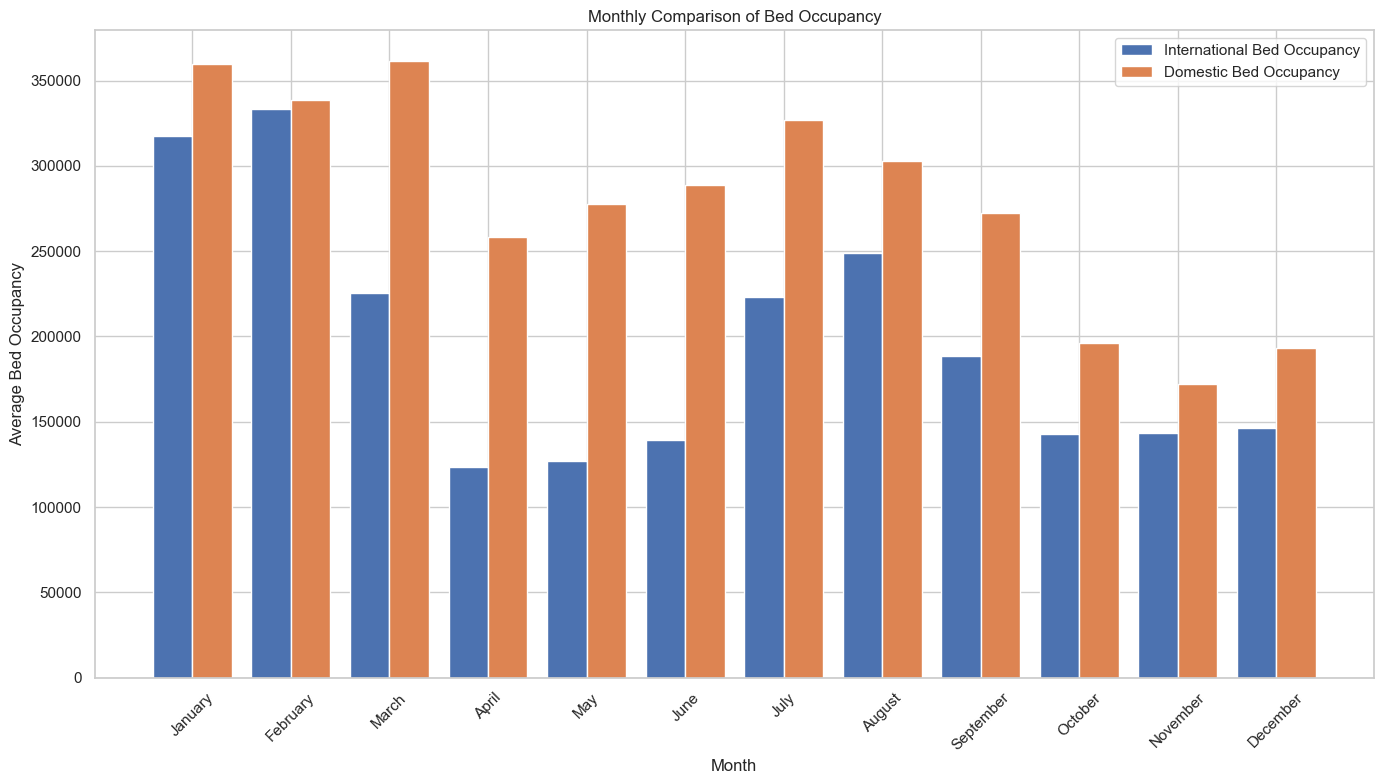

In [104]:
# Plotting monthly averages for international and domestic bed occupancy for comparison
plt.figure(figsize=(14, 8))
plt.bar(monthly_averages.index, monthly_averages['INTERNATIONAL_BED OCCUPANCY'], width=-0.4, align='edge', label='International Bed Occupancy')
plt.bar(monthly_averages.index, monthly_averages['DOMESTIC_BED_OCCUPANCY'], width=0.4, align='edge', label='Domestic Bed Occupancy')

plt.title('Monthly Comparison of Bed Occupancy')
plt.xlabel('Month')
plt.ylabel('Average Bed Occupancy')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Percentage Growth Rates

In [106]:
# To arrange the growth rates from January to December for each year, we'll first ensure that months are ordered correctly in the DataFrame.
# This involves mapping months to their respective order and sorting based on this order.

# Mapping months to their order
month_order = {
    "January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6,
    "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12
}

# Adding a month order column to the DataFrame for sorting
sheet_data_sorted['MONTH_ORDER'] = sheet_data_sorted['MONTH'].map(month_order)

# Sorting the DataFrame by YEAR and MONTH_ORDER
sheet_data_sorted = sheet_data_sorted.sort_values(by=['YEAR', 'MONTH_ORDER'])

# Now selecting and displaying the growth rates for every month, arranged from January to December for each year
growth_rates_ordered = sheet_data_sorted[['YEAR', 'MONTH', 'INTERNATIONAL_GROWTH_RATE', 'DOMESTIC_GROWTH_RATE', 'ROOM_GROWTH_RATE']]

growth_rates_ordered.reset_index(drop=True, inplace=True)
growth_rates_ordered

,YEAR,MONTH,INTERNATIONAL_GROWTH_RATE,DOMESTIC_GROWTH_RATE,ROOM_GROWTH_RATE
0,2019,January,NaN,NaN,NaN
1,2019,February,NaN,NaN,NaN
2,2019,March,NaN,NaN,NaN
3,2019,April,NaN,NaN,NaN
4,2019,May,NaN,NaN,NaN
5,2019,June,NaN,NaN,NaN
6,2019,July,NaN,NaN,NaN
7,2019,August,NaN,NaN,NaN
8,2019,September,NaN,NaN,NaN
9,2019,October,NaN,NaN,NaN


# Inbound Earnings


In [112]:
# Loading the data from the 7th sheet using the method provided by the user, assuming a potential sheet name might be related to earnings or similar
sheet_name = 'Inbound_Earnings'

# Reading the data from the specified sheet name
inbound_earnings_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Calculating the total earnings of each year from the inbound tourism data
total_earnings_per_year = inbound_earnings_data.groupby('YEAR')['INBOUND_EARNINGS'].sum()

total_earnings_per_year.reset_index().rename(columns={'INBOUND_EARNINGS': 'TOTAL_EARNINGS'})

,YEAR,TOTAL_EARNINGS
0,2019,296201000000
1,2020,88562000000
2,2021,146514060000
3,2022,268087278864


## Trend in Yearly Earnings

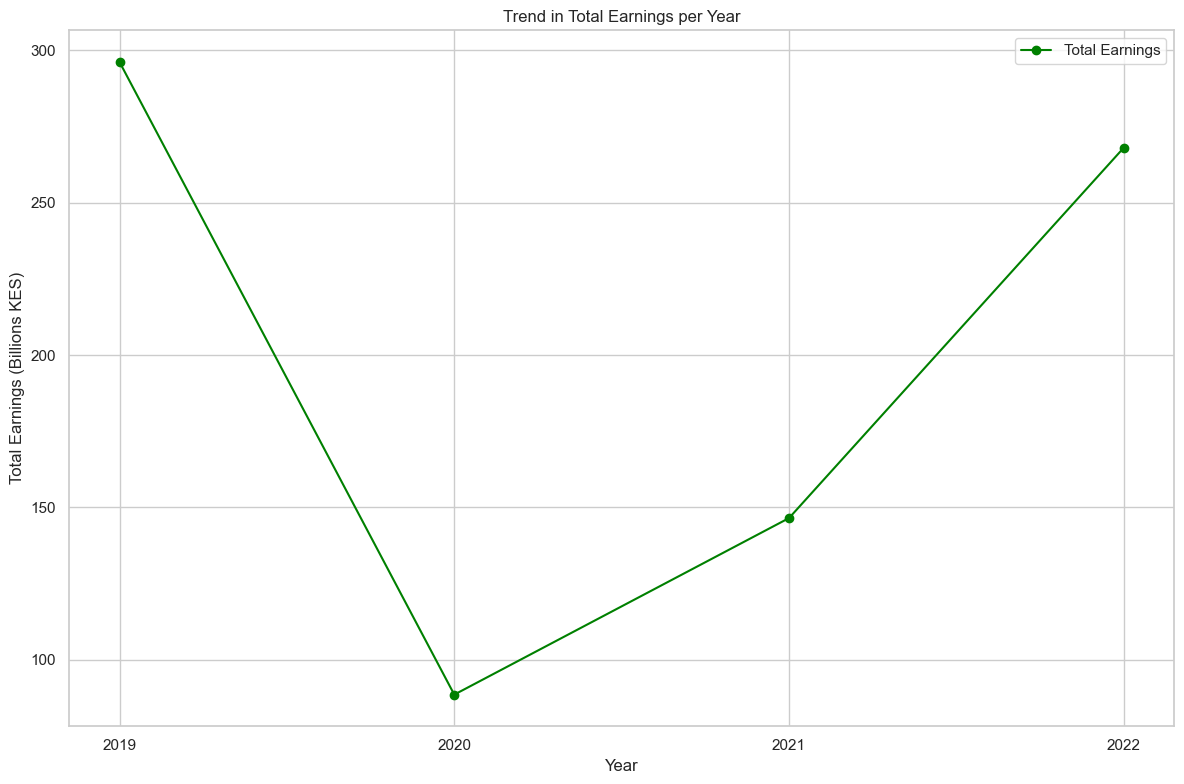

In [113]:
years = total_earnings_per_year.index.astype(int)  # Extracting the years as integers

plt.figure(figsize=(12, 8))
plt.plot(years, total_earnings_per_year / 1e9, label='Total Earnings', marker='o', linestyle='-', color='green')

# Setting x-axis ticks to the whole years
plt.xticks(years)

plt.title('Trend in Total Earnings per Year')
plt.xlabel('Year')
plt.ylabel('Total Earnings (Billions KES)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Trend in Quarterly Earnings

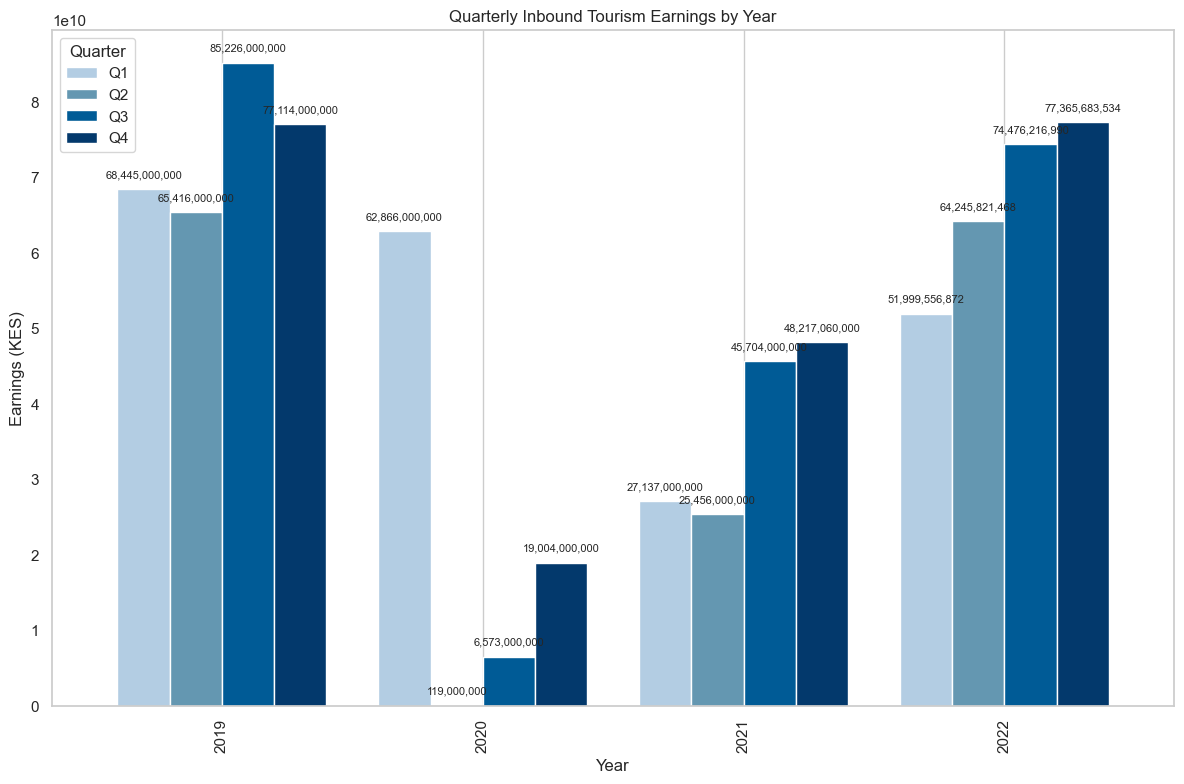

In [111]:
# Loading the data from the 7th sheet using the method provided by the user, assuming a potential sheet name might be related to earnings or similar
sheet_name = 'Inbound_Earnings'

# Reading the data from the specified sheet name
inbound_earnings_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Adjusting the bar graph to ensure better visibility for all bars, including making the first bar more visible by modifying the color map
# Defining a custom color map with more distinguishable shades of blue
from matplotlib.colors import LinearSegmentedColormap

# Custom color map
cmap = LinearSegmentedColormap.from_list('custom_blue', ['#b3cde3', '#6497b1', '#005b96', '#03396c'], N=4)

ax = inbound_earnings_pivot.plot(kind='bar', figsize=(12, 8), colormap=cmap, width=0.8)
plt.title('Quarterly Inbound Tourism Earnings by Year')
plt.xlabel('Year')
plt.ylabel('Earnings (KES)')
plt.legend(title='Quarter', labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.tight_layout()
plt.grid(axis='y')

# Adjusting annotations for better visibility
for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=8)

plt.show()

## Percentage Growth Rate

### Percentage Change for each Quarter in comparison to the same Quarter in the previous year

In [116]:
# To compare the percentage change for each quarter across years, we should calculate the year-over-year growth for each quarter.
# This involves comparing each quarter to the same quarter in the previous year.

# Calculating year-over-year growth for each quarter
inbound_earnings_data['YOY_QUARTERLY_GROWTH'] = inbound_earnings_data.groupby('QUARTER')['INBOUND_EARNINGS'].pct_change(periods=1) * 100

# Selecting relevant columns to display this year-over-year quarterly growth
yoy_quarterly_growth = inbound_earnings_data[['YEAR', 'QUARTER', 'YOY_QUARTERLY_GROWTH']]

yoy_quarterly_growth.reset_index(drop=True, inplace=True)
yoy_quarterly_growth

,YEAR,QUARTER,YOY_QUARTERLY_GROWTH
0,2019,1,NaN
1,2019,2,NaN
2,2019,3,NaN
3,2019,4,NaN
4,2020,1,-8.151070
5,2020,2,-99.818087
6,2020,3,-92.287565
7,2020,4,-75.355966
8,2021,1,-56.833583
9,2021,2,21291.596639


### Percentage Change for each Quarter from the previous one

In [115]:
# Calculating the percentage change in quarterly earnings
quarterly_earnings_growth = inbound_earnings_data.groupby(['YEAR', 'QUARTER'])['INBOUND_EARNINGS'].sum().pct_change() * 100

quarterly_earnings_growth = quarterly_earnings_growth.reset_index().rename(columns={0: 'QUARTERLY_GROWTH_PERCENTAGE'})

quarterly_earnings_growth

,YEAR,QUARTER,INBOUND_EARNINGS
0,2019,1,NaN
1,2019,2,-4.425451
2,2019,3,30.283111
3,2019,4,-9.518222
4,2020,1,-18.476541
5,2020,2,-99.810708
6,2020,3,5423.529412
7,2020,4,189.122166
8,2021,1,42.796253
9,2021,2,-6.194495


### Percentage Change in Total Yearly Earnings

In [117]:
# Calculating the percentage change in total yearly earnings
total_earnings_yearly_growth = total_earnings_per_year.pct_change() * 100

total_earnings_yearly_growth.reset_index().rename(columns={'INBOUND_EARNINGS': 'YEARLY_GROWTH_PERCENTAGE'})


,YEAR,YEARLY_GROWTH_PERCENTAGE
0,2019,NaN
1,2020,-70.100709
2,2021,65.436711
3,2022,82.977169
